<h3 style="text-align: center">Non-linear boundary</h3>
<h4 style="text-align: center">1-hidden layer NN PyTorch<h4>

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_points(X, y, m="_"):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue', edgecolor = 'k',zorder=2, marker=m)
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k',zorder=2, marker=m )

def plot_zone(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue', edgecolor = 'k',zorder=2, marker="+")
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k',zorder=2, marker="_" )  

def net(features):
    h = activation(torch.mm(features, W1) + B1)
    output = activation(torch.mm(h, W2) + B2)
    return output

def view(points,target):

    datamin = np.min(points, axis=0)
    datamax = np.max(points, axis=0)
    xmin, ymin = datamin
    xmax, ymax = datamax    
       
    border = []
    xList = np.linspace(xmin, xmax, 50)
    for x in xList:
        yList = np.linspace(ymin, ymax, 50)
        for y in yList:
            out = net(torch.Tensor([[x,y]]).double())
            if out >= 0.5:
                border.append([x,y,1]) 
            else:
                border.append([x,y,0])

    #print(border)
    border = np.array(border)
    solutionX = border[:, [0,1]]
    solutionT = border[:, [2]]
    plot_zone(solutionX, solutionT)

    plot_points(points, target,m="o")  

In [3]:
data = np.array([
    [1,10,1],
    [3,10,0],
    [1.8,2.0,0],
    [0,6,0],
    [-1,-1,1],
    [-2,10,1],
])

points = data[:, [0,1]]
target = data[:, [2]]

T = torch.from_numpy(target)#.double()
features = torch.from_numpy(points).double()  #.float()

tensor(0.8859, dtype=torch.float64, grad_fn=<SumBackward0>)


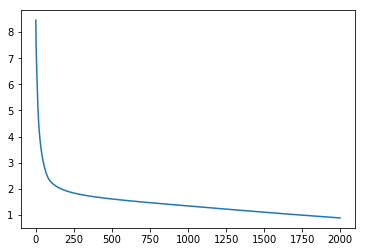

In [4]:
#sigmoid
def sigmoid(x):
    return 1/(1+torch.exp(-x))

activation = sigmoid
#activation = torch.nn.Sigmoid()

# Loss (cross entropy) error function
def error(output, target):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)

### Generate some data
torch.manual_seed(1) # Set the random seed so things are predictable

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 20                   # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = Variable(torch.randn(n_input, n_hidden, dtype=torch.double), requires_grad=True)
# Weights for hidden layer to output layer
W2 = Variable(torch.randn(n_hidden, n_output, dtype=torch.double), requires_grad=True)

# and bias terms for hidden and output layers
#B1 = torch.randn((1, n_hidden)).double()
B1 = Variable(torch.randn(1, n_hidden, dtype=torch.double), requires_grad=True)
#B2 = torch.randn((1, n_output)).double()
B2 = Variable(torch.randn(1, n_output, dtype=torch.double), requires_grad=True)

#epochs = 16000
#alpha = 0.3

epochs = 2000
alpha = 0.01

lossHistory = []

for i in range(epochs):
    h = activation(torch.mm(features, W1) + B1)
    output = activation(torch.mm(h, W2) + B2)

    E = error(output,T)
    loss = torch.sum(E)

    lossHistory.append(loss)
    
    loss.backward()
    
    with torch.no_grad():
        W1 -= alpha * W1.grad
        W2 -= alpha * W2.grad
        B1 -= alpha * B1.grad
        B2 -= alpha * B2.grad

        # Manually zero the gradients after updating weights
        W1.grad.zero_()
        W2.grad.zero_()
        B1.grad.zero_()
        B2.grad.zero_()
        
print(loss)  
plt.plot(lossHistory)
plt.show() 

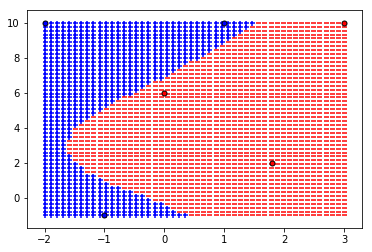

In [5]:
view(points,target)